## Prepare mesh

In [1]:
!gmsh collimator.geo -setnumber geomtype 0 -2 -o collimator_sibc.msh >& /dev/null
!convert_msh.py collimator_sibc.msh collimator_sibc.xdmf
!gmsh collimator.geo -setnumber geomtype 1 -2 -o collimator_metal.msh >& /dev/null
!convert_msh.py collimator_metal.msh collimator_metal.xdmf

## Solution preparation

Import BeamImpedance2D module

In [2]:
import logging
import bi2d
from bi2d.materials import vacuum, beam
import numpy as np

In [3]:
beam.index = 1
vacuum.index = 2
carbon = bi2d.Material(3, sigma=1e4)
wall = carbon.copy()
wall.index = -1

Setup mesh and materials

In [4]:
m_sibc = bi2d.Mesh("collimator_sibc.xdmf")
mc_sibc = bi2d.MaterialMap(m_sibc, [beam, vacuum])
m_metal = bi2d.Mesh("collimator_metal.xdmf")
mc_metal = bi2d.MaterialMap(m_metal, [beam, vacuum, carbon])

Configure solution

In [5]:
solution_sibc = bi2d.Solution(mc_sibc, Hcurl_order=2, H1_order=2)
solution_metal = bi2d.Solution(mc_metal, Hcurl_order=2, H1_order=2)
solution_metal.logger.setLevel(logging.WARNING)
solution_sibc.logger.setLevel(logging.WARNING)

## Calculate impedance

Calculate impedance in frequency range and save the results

In [6]:
%%time

data_sibc_monopole_01 = solution_sibc.get_z(np.logspace(6, 11, num=30), beta=0.1, source_function=bi2d.SourceFunction.MONOPOLE, sibc=[wall])
data_sibc_monopole_09 = solution_sibc.get_z(np.logspace(6, 11, num=30), beta=0.999999, source_function=bi2d.SourceFunction.MONOPOLE, sibc=[wall])

CPU times: user 3min 46s, sys: 8.13 s, total: 3min 54s
Wall time: 3min 55s


In [7]:
%%time

data_metal_monopole_01 = solution_metal.get_z(np.logspace(2, 7, num=30), beta=0.1, source_function=bi2d.SourceFunction.MONOPOLE)
data_metal_monopole_09 = solution_metal.get_z(np.logspace(2, 7, num=30), beta=0.999999, source_function=bi2d.SourceFunction.MONOPOLE)

CPU times: user 11min 5s, sys: 20.7 s, total: 11min 25s
Wall time: 11min 26s


## Plot impedances

In [8]:
import pylab
pylab.rcParams['figure.figsize'] = [12, 8]

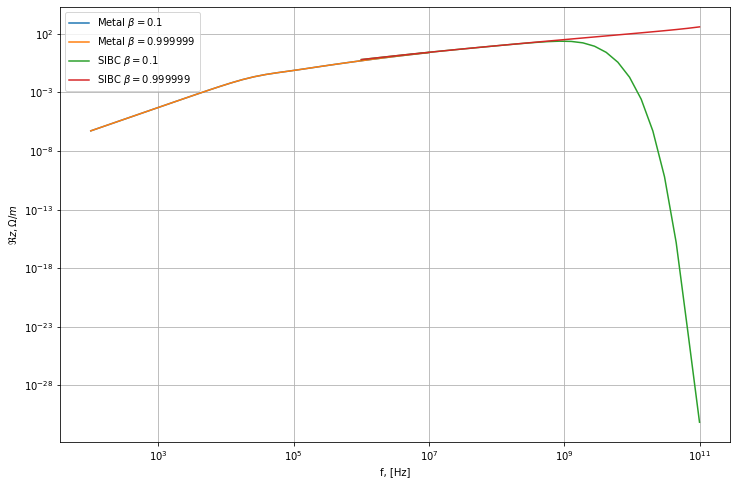

In [9]:
pylab.plot(data_metal_monopole_01[:,0], data_metal_monopole_01[:,1])
pylab.plot(data_metal_monopole_09[:,0], data_metal_monopole_09[:,1])
pylab.plot(data_sibc_monopole_01[:,0], data_sibc_monopole_01[:,1])
pylab.plot(data_sibc_monopole_09[:,0], data_sibc_monopole_09[:,1])
pylab.yscale("log")
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$\Re{z}, \Omega/m$")
pylab.grid()
pylab.legend([r"Metal $\beta=0.1$", r"Metal $\beta=0.999999$", r"SIBC $\beta=0.1$", r"SIBC $\beta=0.999999$"])
pylab.show()

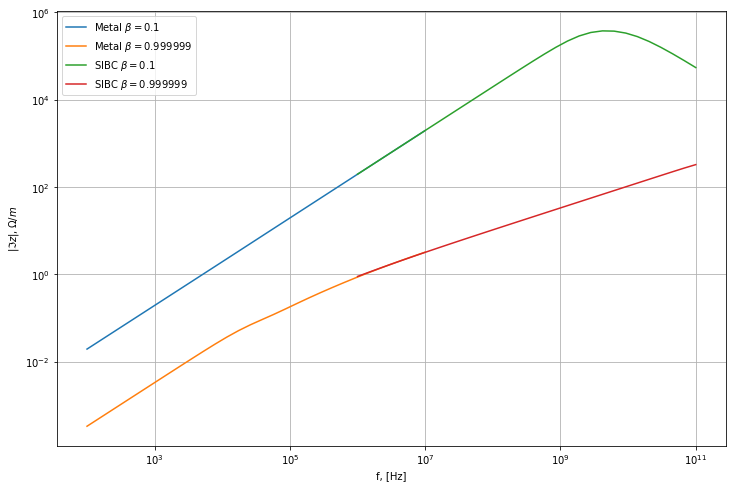

In [10]:
pylab.plot(data_metal_monopole_01[:,0], np.abs(data_metal_monopole_01[:,2]))
pylab.plot(data_metal_monopole_09[:,0], np.abs(data_metal_monopole_09[:,2]))
pylab.plot(data_sibc_monopole_01[:,0], np.abs(data_sibc_monopole_01[:,2]))
pylab.plot(data_sibc_monopole_09[:,0], np.abs(data_sibc_monopole_09[:,2]))
pylab.xscale("log")
pylab.yscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$|\Im{z}|, \Omega/m$")
pylab.grid()
pylab.legend([r"Metal $\beta=0.1$", r"Metal $\beta=0.999999$", r"SIBC $\beta=0.1$", r"SIBC $\beta=0.999999$"])
pylab.show()

In [11]:
%%time

data_sibc_dipole_0_01 = solution_sibc.get_z(np.logspace(6, 11, num=30), beta=0.1, source_function=bi2d.SourceFunction.DIPOLE, sibc=[wall])
data_sibc_dipole_0_09 = solution_sibc.get_z(np.logspace(6, 11, num=30), beta=0.999999, source_function=bi2d.SourceFunction.DIPOLE, sibc=[wall])

CPU times: user 3min 52s, sys: 6.86 s, total: 3min 59s
Wall time: 4min


In [12]:
%%time

data_metal_dipole_0_01 = solution_metal.get_z(np.logspace(2, 7, num=30), beta=0.1, source_function=bi2d.SourceFunction.DIPOLE)
data_metal_dipole_0_09 = solution_metal.get_z(np.logspace(2, 7, num=30), beta=0.999999, source_function=bi2d.SourceFunction.DIPOLE)

CPU times: user 10min 56s, sys: 19.3 s, total: 11min 16s
Wall time: 11min 16s


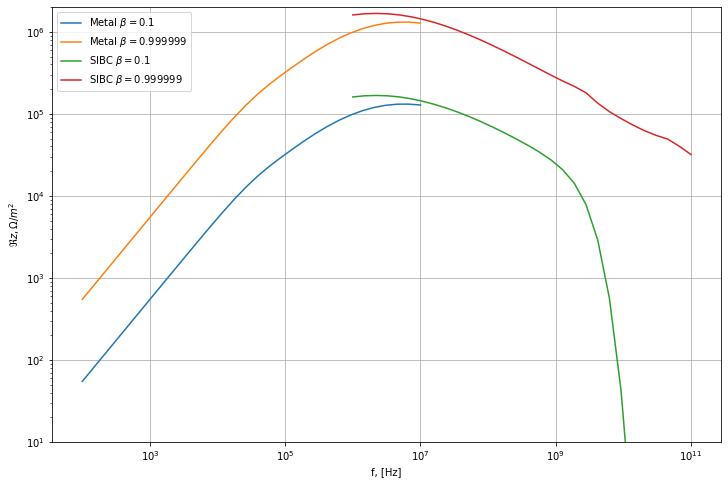

In [13]:
pylab.plot(data_metal_dipole_0_01[:,0], data_metal_dipole_0_01[:,1])
pylab.plot(data_metal_dipole_0_09[:,0], data_metal_dipole_0_09[:,1])
pylab.plot(data_sibc_dipole_0_01[:,0], data_sibc_dipole_0_01[:,1])
pylab.plot(data_sibc_dipole_0_09[:,0], data_sibc_dipole_0_09[:,1])
pylab.yscale("log")
pylab.ylim((1e1, 2e6))
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$\Re{z}, \Omega/m^2$")
pylab.grid()
pylab.legend([r"Metal $\beta=0.1$", r"Metal $\beta=0.999999$", r"SIBC $\beta=0.1$", r"SIBC $\beta=0.999999$"])
pylab.show()

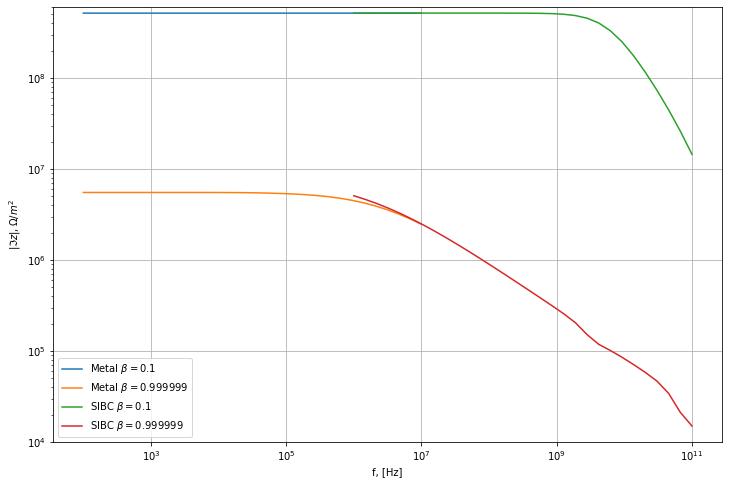

In [14]:
pylab.plot(data_metal_dipole_0_01[:,0], np.abs(data_metal_dipole_0_01[:,2]))
pylab.plot(data_metal_dipole_0_09[:,0], np.abs(data_metal_dipole_0_09[:,2]))
pylab.plot(data_sibc_dipole_0_01[:,0], np.abs(data_sibc_dipole_0_01[:,2]))
pylab.plot(data_sibc_dipole_0_09[:,0], np.abs(data_sibc_dipole_0_09[:,2]))
pylab.yscale("log")
pylab.ylim((1e4, 6e8))
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$|\Im{z}|, \Omega/m^2$")
pylab.grid()
pylab.legend([r"Metal $\beta=0.1$", r"Metal $\beta=0.999999$", r"SIBC $\beta=0.1$", r"SIBC $\beta=0.999999$"])
pylab.show()

In [15]:
%%time

data_sibc_dipole_90_01 = solution_sibc.get_z(np.logspace(6, 11, num=30), beta=0.1, rotation=np.pi/2, source_function=bi2d.SourceFunction.DIPOLE, sibc=[wall])
data_sibc_dipole_90_09 = solution_sibc.get_z(np.logspace(6, 11, num=30), beta=0.999999, rotation=np.pi/2, source_function=bi2d.SourceFunction.DIPOLE, sibc=[wall])

CPU times: user 3min 49s, sys: 7.04 s, total: 3min 56s
Wall time: 3min 56s


In [16]:
%%time

data_metal_dipole_90_01 = solution_metal.get_z(np.logspace(2, 7, num=30), beta=0.1, rotation=np.pi/2, source_function=bi2d.SourceFunction.DIPOLE)
data_metal_dipole_90_09 = solution_metal.get_z(np.logspace(2, 7, num=30), beta=0.999999, rotation=np.pi/2, source_function=bi2d.SourceFunction.DIPOLE)

CPU times: user 11min 48s, sys: 20.4 s, total: 12min 9s
Wall time: 12min 10s


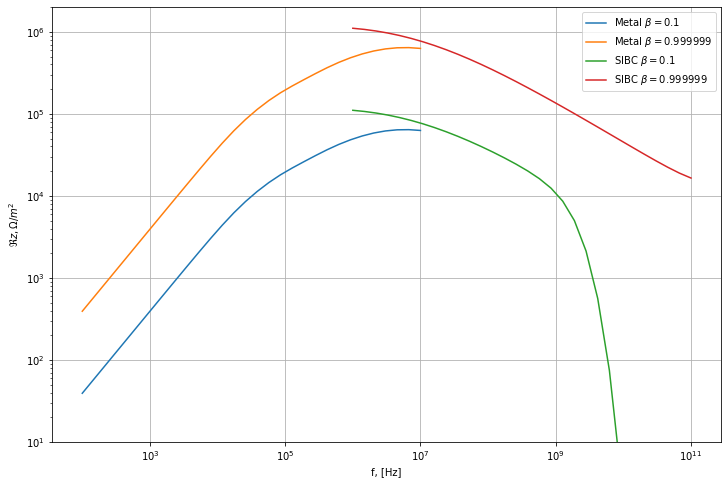

In [17]:
pylab.plot(data_metal_dipole_90_01[:,0], data_metal_dipole_90_01[:,1])
pylab.plot(data_metal_dipole_90_09[:,0], data_metal_dipole_90_09[:,1])
pylab.plot(data_sibc_dipole_90_01[:,0], data_sibc_dipole_90_01[:,1])
pylab.plot(data_sibc_dipole_90_09[:,0], data_sibc_dipole_90_09[:,1])
pylab.yscale("log")
pylab.ylim((1e1, 2e6))
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$\Re{z}, \Omega/m^2$")
pylab.grid()
pylab.legend([r"Metal $\beta=0.1$", r"Metal $\beta=0.999999$", r"SIBC $\beta=0.1$", r"SIBC $\beta=0.999999$"])
pylab.show()

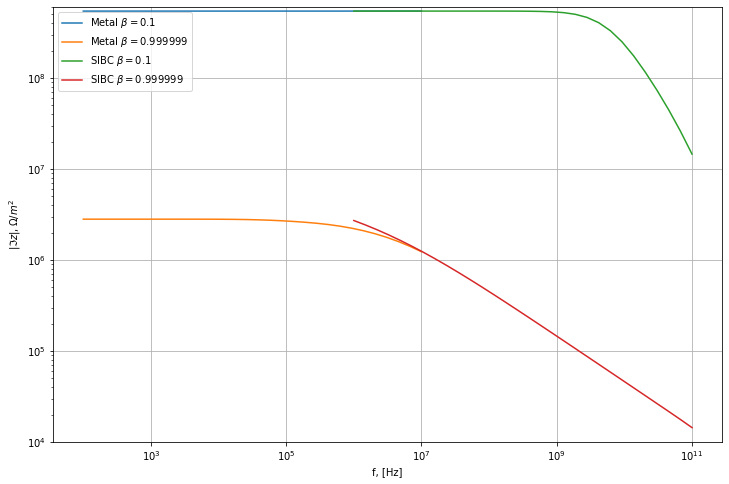

In [18]:
pylab.plot(data_metal_dipole_90_01[:,0], np.abs(data_metal_dipole_90_01[:,2]))
pylab.plot(data_metal_dipole_90_09[:,0], np.abs(data_metal_dipole_90_09[:,2]))
pylab.plot(data_sibc_dipole_90_01[:,0], np.abs(data_sibc_dipole_90_01[:,2]))
pylab.plot(data_sibc_dipole_90_09[:,0], np.abs(data_sibc_dipole_90_09[:,2]))
pylab.yscale("log")
pylab.ylim((1e4, 6e8))
pylab.xscale("log")
pylab.xlabel("f, [Hz]")
pylab.ylabel(r"$|\Im{z}|, \Omega/m^2$")
pylab.grid()
pylab.legend([r"Metal $\beta=0.1$", r"Metal $\beta=0.999999$", r"SIBC $\beta=0.1$", r"SIBC $\beta=0.999999$"])
pylab.show()